<a href="https://colab.research.google.com/github/wawa6609/googlecolab/blob/master/darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Google\ Colab/
#%cd darknet/

#Installing cudnn

In [0]:
!tar -xzvf cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a


#Downloading darknet

In [0]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5904, done.
remote: Total 5904 (delta 0), reused 0 (delta 0), pack-reused 5904
Receiving objects: 100% (5904/5904), 6.32 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.
Checking out files: 100% (979/979), done.


#Installing/enabling darknet

In [0]:
%cd darknet/
#!make
!chmod +x ./darknet

/content/drive/My Drive/Google Colab/darknet


#Downloading yolo weights

In [0]:
%cd weights/

# yolov2
#!wget https://pjreddie.com/media/files/yolov2.weights

# yolov3
#!wget https://pjreddie.com/media/files/yolov3.weights

# yolov3-tiny
#!wget https://pjreddie.com/media/files/yolov3-tiny.weights

# pretrained weights
#!wget https://pjreddie.com/media/files/darknet53.conv.74

%cd ..

#Recovering primary data

In [0]:
!rm -r data
!mv data_old/ data/
!ls data

9k.labels   coco.names	 goal.txt		   inet9k.map	     person.jpg
9k.names    dog.jpg	 horses.jpg		   kite.jpg	     scream.jpg
9k.tree     eagle.jpg	 imagenet.labels.list	   labels	     voc.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names


#Own data for net training

In [0]:
!mv data/ data_old/
!cp -r ../MyNet/data/ .
!cp -r data_old/labels/ data/
!cp data/obj.names data/coco.names

#Starting net training

In [0]:
!./darknet detector train data/obj.data cfg/myown.cfg weights/darknet53.conv.74

#Resuming training

In [0]:
!cp backup/myown.backup weights/myown.weights
!./darknet detector train data/obj.data cfg/myown.cfg weights/myown.weights

#Example detection

In [0]:
# yolov2
#!./darknet detect cfg/yolov2.cfg weights/yolov2.weights data/person.jpg

# yolov3-tiny
#!./darknet detect cfg/yolov3-tiny.cfg weights/yolov3-tiny.weights data/giraffe.jpg

# yolov3
#!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/dog.jpg

# myown
!./darknet detect cfg/myown.cfg weights/myown.weights data/img/ -thresh 0.3

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

#Displaying detections

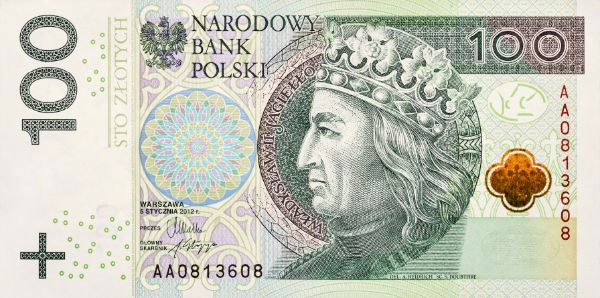

In [0]:
from IPython.display import Image, display
display(Image('predictions.jpg'))